### What is a Random Forest?

- Random Forest is a type **Ensemble Machine Learning** algorithm called Bootstrap Aggregation or bagging.
    - model type:
        - Random Forest
    - a kind of Ensemble Machine Learning algorithm
        - is an algorithm composed of multiple models
            - any time we combine mutiple algorithms/models together == ensemble
        - the point is to
            - increase pros
            - decrease cons
    - short version:
        - we make a bunch of trees and then average the predictions
            - ensamble because we have many trees
                - can have 10 trees
                - can have 1,000 trees
                - can have 10,000 trees
                - etc.
    - If we have a gigantic population of observations it may be time/cost prohibitive to measure every one of those obsevations


### How does it work?
- **Bootstrapping** is a statistical method for estimating a quantity from a data sample 
    - taking a whole bunch of sample ( not whole population), get the mean for each same, then average those sampe sample averages
    - e.g. mean. 
        - You take lots of samples of your data, calculate the mean, then average all of your mean values to give you a better estimation of the true mean value. 
    - Dont build by hand in python
        - since it is already built with sklearn we can just use it      
- **Bagging**
    - the same approach is used for estimating entire statistical models, such as decision trees. 
        - Multiple samples of your training data are taken and models are constructed for each sample set. 
- When you need to make a prediction for new data, each model makes a prediction and the **predictions are averaged** to give a better estimate of the true output value.
    - why would we need to average our predicaitons?



### Intro to Bootstrapping
- bootstrapping means to average a bunch of sample means to approximate the population mean.

- Process:
    - create a bunch of samples of the entire population
    - Calculate the mean for each sample
    - average the averages
    - we'll only average averages if the sample sizes are identical
    - dependent on/connected w/ Central Limit Theorum

In [51]:
# Datta Processing
import pandas as pd
import numpy as np

In [52]:
# Let's setup a whole bunch of observations to create a population

x = np.random.randint(0, 10_000, size=100_000)
x = pd.Series(x)

<AxesSubplot:>

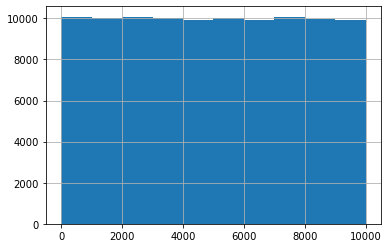

In [53]:
x.hist()

In [54]:
# Let's imagine that the population is too large for us to measure
averages = []

# Let's calculate the mean for many, many random samples from our population
for i in range(10_000):
    sample = x.sample(50)
    averages.append(sample.mean())

averages = pd.Series(averages)

In [55]:
averages

0       5515.20
1       4966.04
2       5506.28
3       4549.54
4       5196.98
         ...   
9995    5415.28
9996    4469.88
9997    4365.44
9998    5199.56
9999    5340.90
Length: 10000, dtype: float64

In [56]:
averages.mean()

4994.074805999999

In [57]:
x.mean()

4989.6963

<AxesSubplot:>

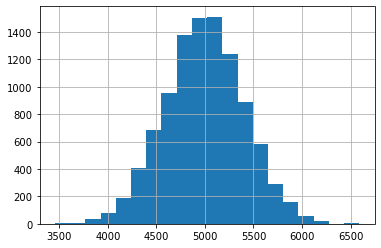

In [48]:
averages.hist(bins = 20)

### How does it work? Continued.

- What makes the ranom forest different from the decision tree?
    - Random forest is a tweak on this approach where decision trees are created so that rather than selecting optimal split points, suboptimal splits are made by introducing randomness.
        - The models created for each sample of the data are therefore more different than they otherwise would be, but still accurate in their unique and different ways. 
            - Combining their predictions results in a better estimate of the true underlying output value.


- In the example below, "Will I exercise", "I" am a single observation. Each person is an observation. 
    - The model takes each observation through the forest and votes on the most frequent class for that observation to get a final prediction.

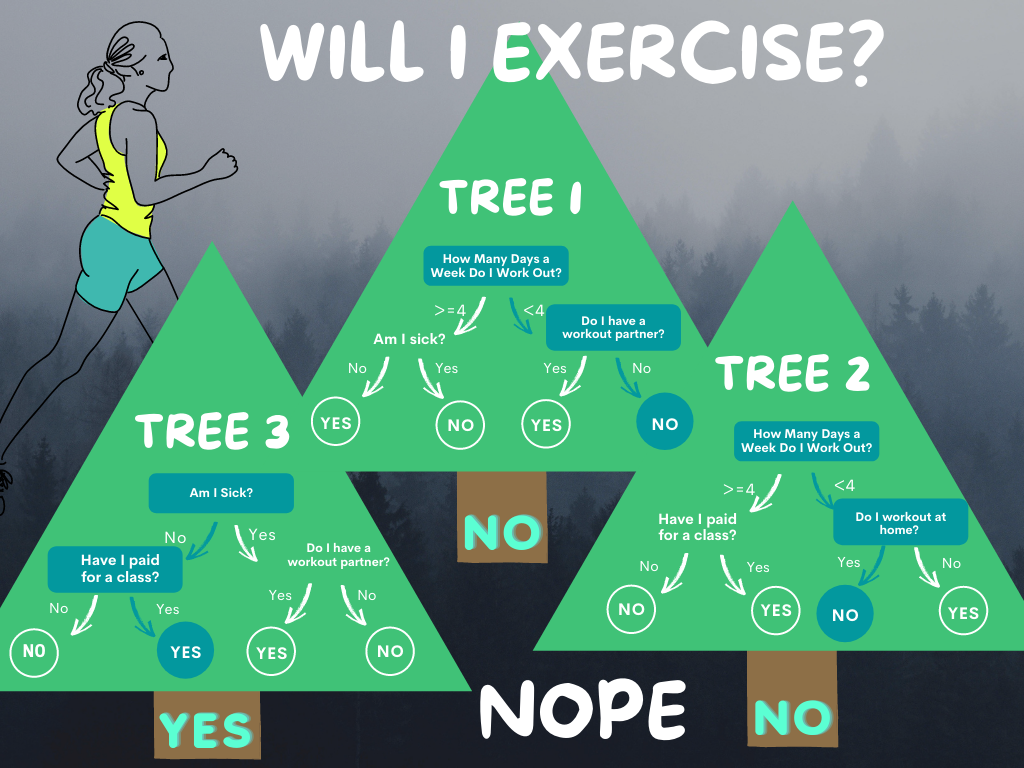Random Forest Diagram

- Majority rule!
    - above we have 2 no's and 1 yes therfore no the person would not be going to workout

### Pros
1. Reduction in over-fitting
2. More accurate than decision trees in most cases
3. Naturally performs feature selection

### Cons
1. Slow real time prediction
2. Difficult to implement
3. Complex algorithm so difficult to explain

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # this is a whole library containing a bunch random forest is just one of many
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pydataset import data # grabbing iris dataset

# read Iris data from pydatset
df = data('iris')

# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

df.head()

## Train Validate Test
Now we'll do our train/validate/test split:
- We'll do exploration and train our model on the `train` data
- We tune our model on `validate`, since it will be out-of-sample until we use it.
- And keep the `test` nice and safe and separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.

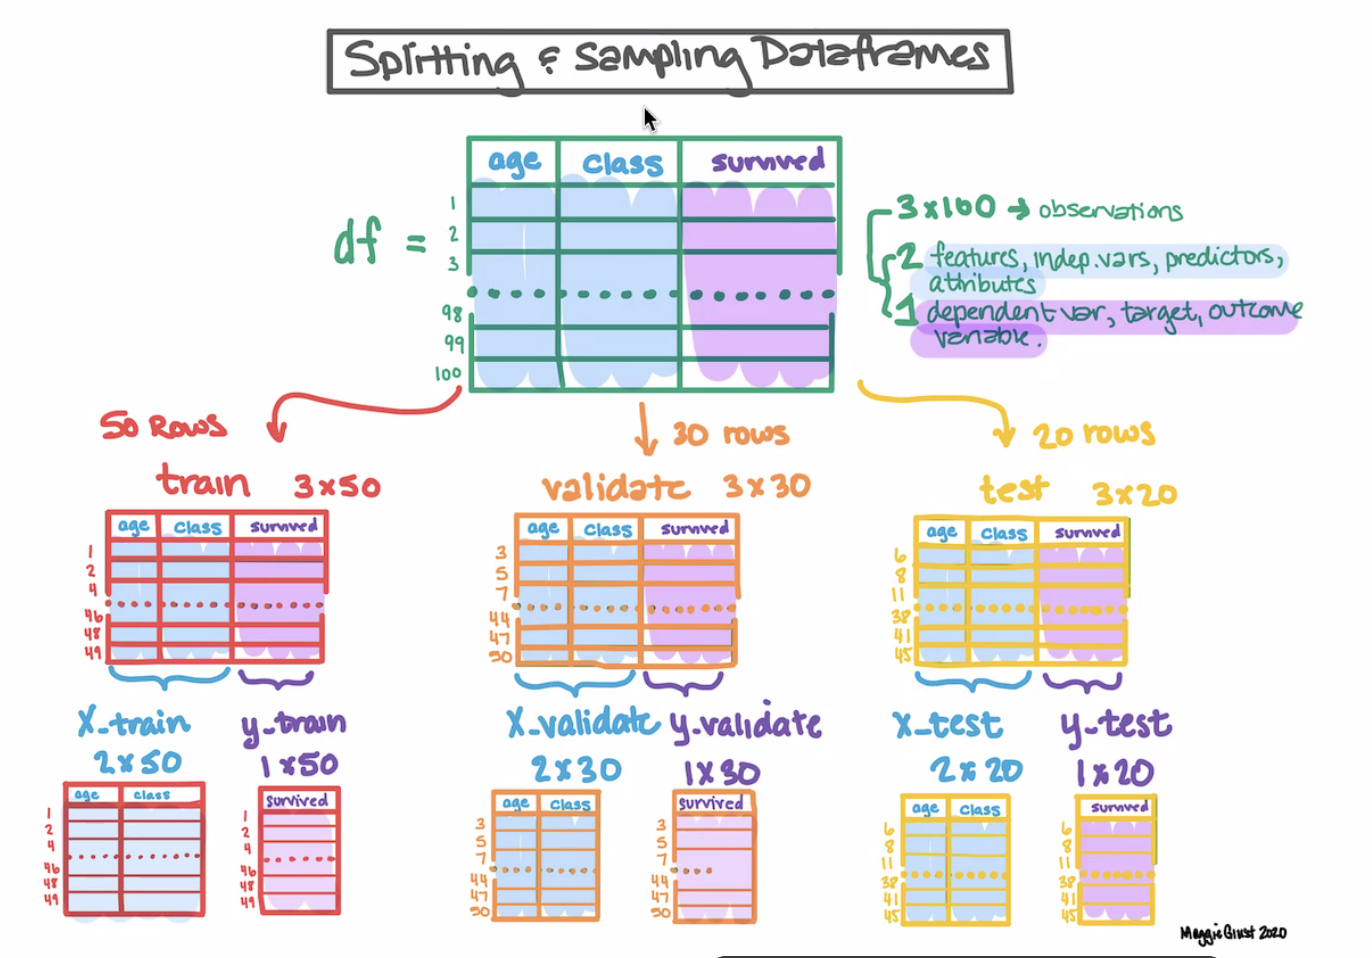

In [32]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [33]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species

## Train Model
### Create the Random Forest Object
Model parameters and default values for class `sklearn.ensemble.RandomForestClassifier`

- `n_estimators=’warn’`
    - number of trees that we are creating
        - default to 100
- `criterion=’gini’`

- `max_depth=None`
    - how deep it wil go
        - will still go as many possible split points if not add in
- `min_samples_split=2`
- `min_samples_leaf=1`
- `min_weight_fraction_leaf=0.0`
- `max_features=’auto’`
- `max_leaf_nodes=None`
- `min_impurity_decrease=0.0`
- `min_impurity_split=None`
- `bootstrap=True`
- `oob_score=False`
- `n_jobs=None`
- `random_state=None`
- `verbose=0`
- `warm_start=False`
- `class_weight=None`

Most of these defaults are good with the exception of max_depth

All of these can be passed as key word arguments to RandomForestClassifier

In [34]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

### Fit the model

Fit the random forest algorithm to the training data.

In [35]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

### Feature Importances

Evaluate importance, or weight, of each feature.

In [36]:
print(rf.feature_importances_)

[0.08209193 0.02845967 0.47781398 0.41163442]


### Make Predictions
Classify each flower by its estimated species.

In [37]:
y_pred = rf.predict(X_train)

### Estimate Probability

Estimate the probability of each species, using the training data.

In [38]:
y_pred_proba = rf.predict_proba(X_train)

## Evaluate Model
### Compute the Accuracy

In [39]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.98


### Create a confusion matrix

In [40]:
print(confusion_matrix(y_train, y_pred))

[[28  0  0]
 [ 0 26  2]
 [ 0  0 28]]


### Create a classificaiton report

In [41]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       1.00      0.93      0.96        28
   virginica       0.93      1.00      0.97        28

    accuracy                           0.98        84
   macro avg       0.98      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84



### Validate Model
**Evaluate on Out-of-Sample data**

Compute the accuracy of the model when run on the validate dataset.

In [42]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.97
